[ADS Entry](http://adsabs.harvard.edu/abs/1990ApJ...365L..55S)

In [32]:
import sympy
sympy.init_printing()

One difficulty that I had with equation 1 is that is assumes that the pair production cross section decreases quadratically with the photon energy. The cross section for pair production can be found in equation 32 in [Weaver 1976](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.13.1563). The full calculation can be found in [Theory of Photons and Electrons by Jauch and Rohrlich (1955)](https://archive.org/details/TheoryOfPhotonsElectrons).

Equation 1

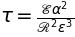

In [33]:
sigma_T = sympy.Symbol('sigma_T')
epsilon = sympy.Symbol('epsilon')
n_gamma = sympy.Symbol('n_gamma')
mathscrE = sympy.Symbol(r'\mathscr{E}')
mathscrR = sympy.Symbol(r'\mathscr{R}')
tau = sympy.Symbol('tau')
hbar = sympy.Symbol('hbar', positive=True)
c = sympy.Symbol('c',positive=True)
m_e = sympy.Symbol('m_e', positive=True)
R = sympy.Symbol('R', positive=True)
alpha = sympy.Symbol('alpha')
compton_wavelength = hbar/(m_e*c)
_ = sigma_T*n_gamma*R/epsilon**2
_ = _.subs(n_gamma,mathscrE/epsilon/R**3)
_ = _.subs(R,mathscrR*compton_wavelength)
_ = _.subs(sigma_T,alpha**2*compton_wavelength**2)
eqn_1 = sympy.Eq(tau,_)
eqn_1

To derive equation 2, we begin with the Fermi distribution function for electrons

$n = \int_0^{\infty} \frac{p^2 dp}{\hbar^3} \left[1+\exp \left(\frac{\mu + \sqrt{p^2 c^2 + m_e^2 c^4}}{k T} \right)\right]^{-1} =$

Since the electrons are in equilibrium with photons, the chemical potential vanishes $\mu = 0$

$ = \int_0^{\infty} \frac{p^2 dp}{\hbar^3} \left[1+\exp \left(\frac{\sqrt{p^2 c^2 + m_e^2 c^4}}{k T} \right)\right]^{-1} \approx$

Since we are dealing with temperatures much smaller than the electron rest mass energy, the exponential term in the denominator is much larger than unity

$ \approx \int_0^{\infty} \frac{p^2 dp}{\hbar^3} \exp \left(-\frac{\sqrt{p^2 c^2 + m_e^2 c^4}}{k T} \right) \approx$

Most of the contribution to the integral comes from the $p \ll m_e c$, so

$ \approx \exp \left(-\frac{m_e c^2}{k T} \right) \int_0^{\infty} \frac{p^2 dp}{\hbar^3} \exp \left(-\frac{p^2}{m_e k T} \right) \approx \exp \left(-\frac{m_e c^2}{k T} \right) \left(\frac{m_e k T}{\hbar^2} \right)^{3/2}$

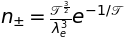

In [34]:
k = sympy.Symbol('k')
T = sympy.Symbol('T')
lambda_e = sympy.Symbol('lambda_e')
mathscrT = sympy.Symbol(r'\mathscr{T}')
n_pm = sympy.Symbol(r'n_{\pm}')
_ = sympy.exp(-m_e*c**2/k/T)*(m_e*k*T/hbar**2)**sympy.Rational(3,2)
_ = _.subs(T,mathscrT*m_e*c**2/k)
_ = _.subs(hbar,sympy.solve(sympy.Eq(lambda_e,compton_wavelength),hbar)[0])
eqn_2 = sympy.Eq(n_pm,_)
eqn_2

Equation 3

In [35]:
_ = sympy.Eq(mathscrE,R**3*(k*T)**4/(hbar*c)**3/(m_e*c**2))
_ = _.subs(T,mathscrT*m_e*c**2/k)
_ = _.subs(R, mathscrR*compton_wavelength)
eqn_3 = _
eqn_3

The energy density in the fireball is comparable to the pressure $p$. The total energy in the fireball is therefore $R^3 p$. In order to escape, a photon has to travel a distance $R$. If the mean free path is $l$, then the number of scatterings it takes for a photon to reach the same is $\left(R/l \right)^2$, and so the actual path the photon travels before escaping is larger $R^2/l$. The photon moves all the while at the speed of light, so the escape time is $\tau \approx \frac{R^2}{c l} \approx \frac{R}{c} \tau$. The luminosity is therefore 

$L \approx \frac{p R^2 c}{\tau}$.

The ratio between the luminosity and mechanical power is

$\frac{L}{p dV/dt} \approx {p R^2 c}{p R^2 dR/dt} \frac{1}{\tau} \approx \frac{1}{\tau}$

Equation 5

In [36]:
V = sympy.Symbol('V')
gamma = sympy.Symbol('gamma')
_ = V**(gamma-1)*T
_ = _.subs(gamma,sympy.Rational(4,3))
_ = _.subs(V,R**3)
_.simplify()